# Importing Libraries and Dataset

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', 'authors': '

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#link source: https://archive.ics.uci.edu/dataset/242/energy+efficiency

enef_dtst = energy_efficiency.data.original
enef_dtst.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
enef_dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
enef_dtst.shape

(768, 10)

In [8]:
enef_dtst.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Data Preprocessing

In [9]:
enef_dup = enef_dtst.copy()
enef_dup.info()
enef_dup.head()
enef_dup.shape
enef_dup.describe()

print("\nPercentage of Null Values:")
round(100*(enef_dup.isnull().sum()/len(enef_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

Percentage of Null Values:


X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
X7    0.0
X8    0.0
Y1    0.0
Y2    0.0
dtype: float64

In [10]:
enef_dup.drop_duplicates(subset = None, inplace = True)
print(enef_dup.shape)

(768, 10)


In [11]:
enef_dup.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

#

#Feature Selection

       X1     X2     X3      X4   X5   X7  X8
0    0.98  514.5  294.0  110.25  7.0  0.0   0
1    0.98  514.5  294.0  110.25  7.0  0.0   0
2    0.98  514.5  294.0  110.25  7.0  0.0   0
3    0.98  514.5  294.0  110.25  7.0  0.0   0
4    0.90  563.5  318.5  122.50  7.0  0.0   0
..    ...    ...    ...     ...  ...  ...  ..
763  0.64  784.0  343.0  220.50  3.5  0.4   5
764  0.62  808.5  367.5  220.50  3.5  0.4   5
765  0.62  808.5  367.5  220.50  3.5  0.4   5
766  0.62  808.5  367.5  220.50  3.5  0.4   5
767  0.62  808.5  367.5  220.50  3.5  0.4   5

[768 rows x 7 columns] 0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64


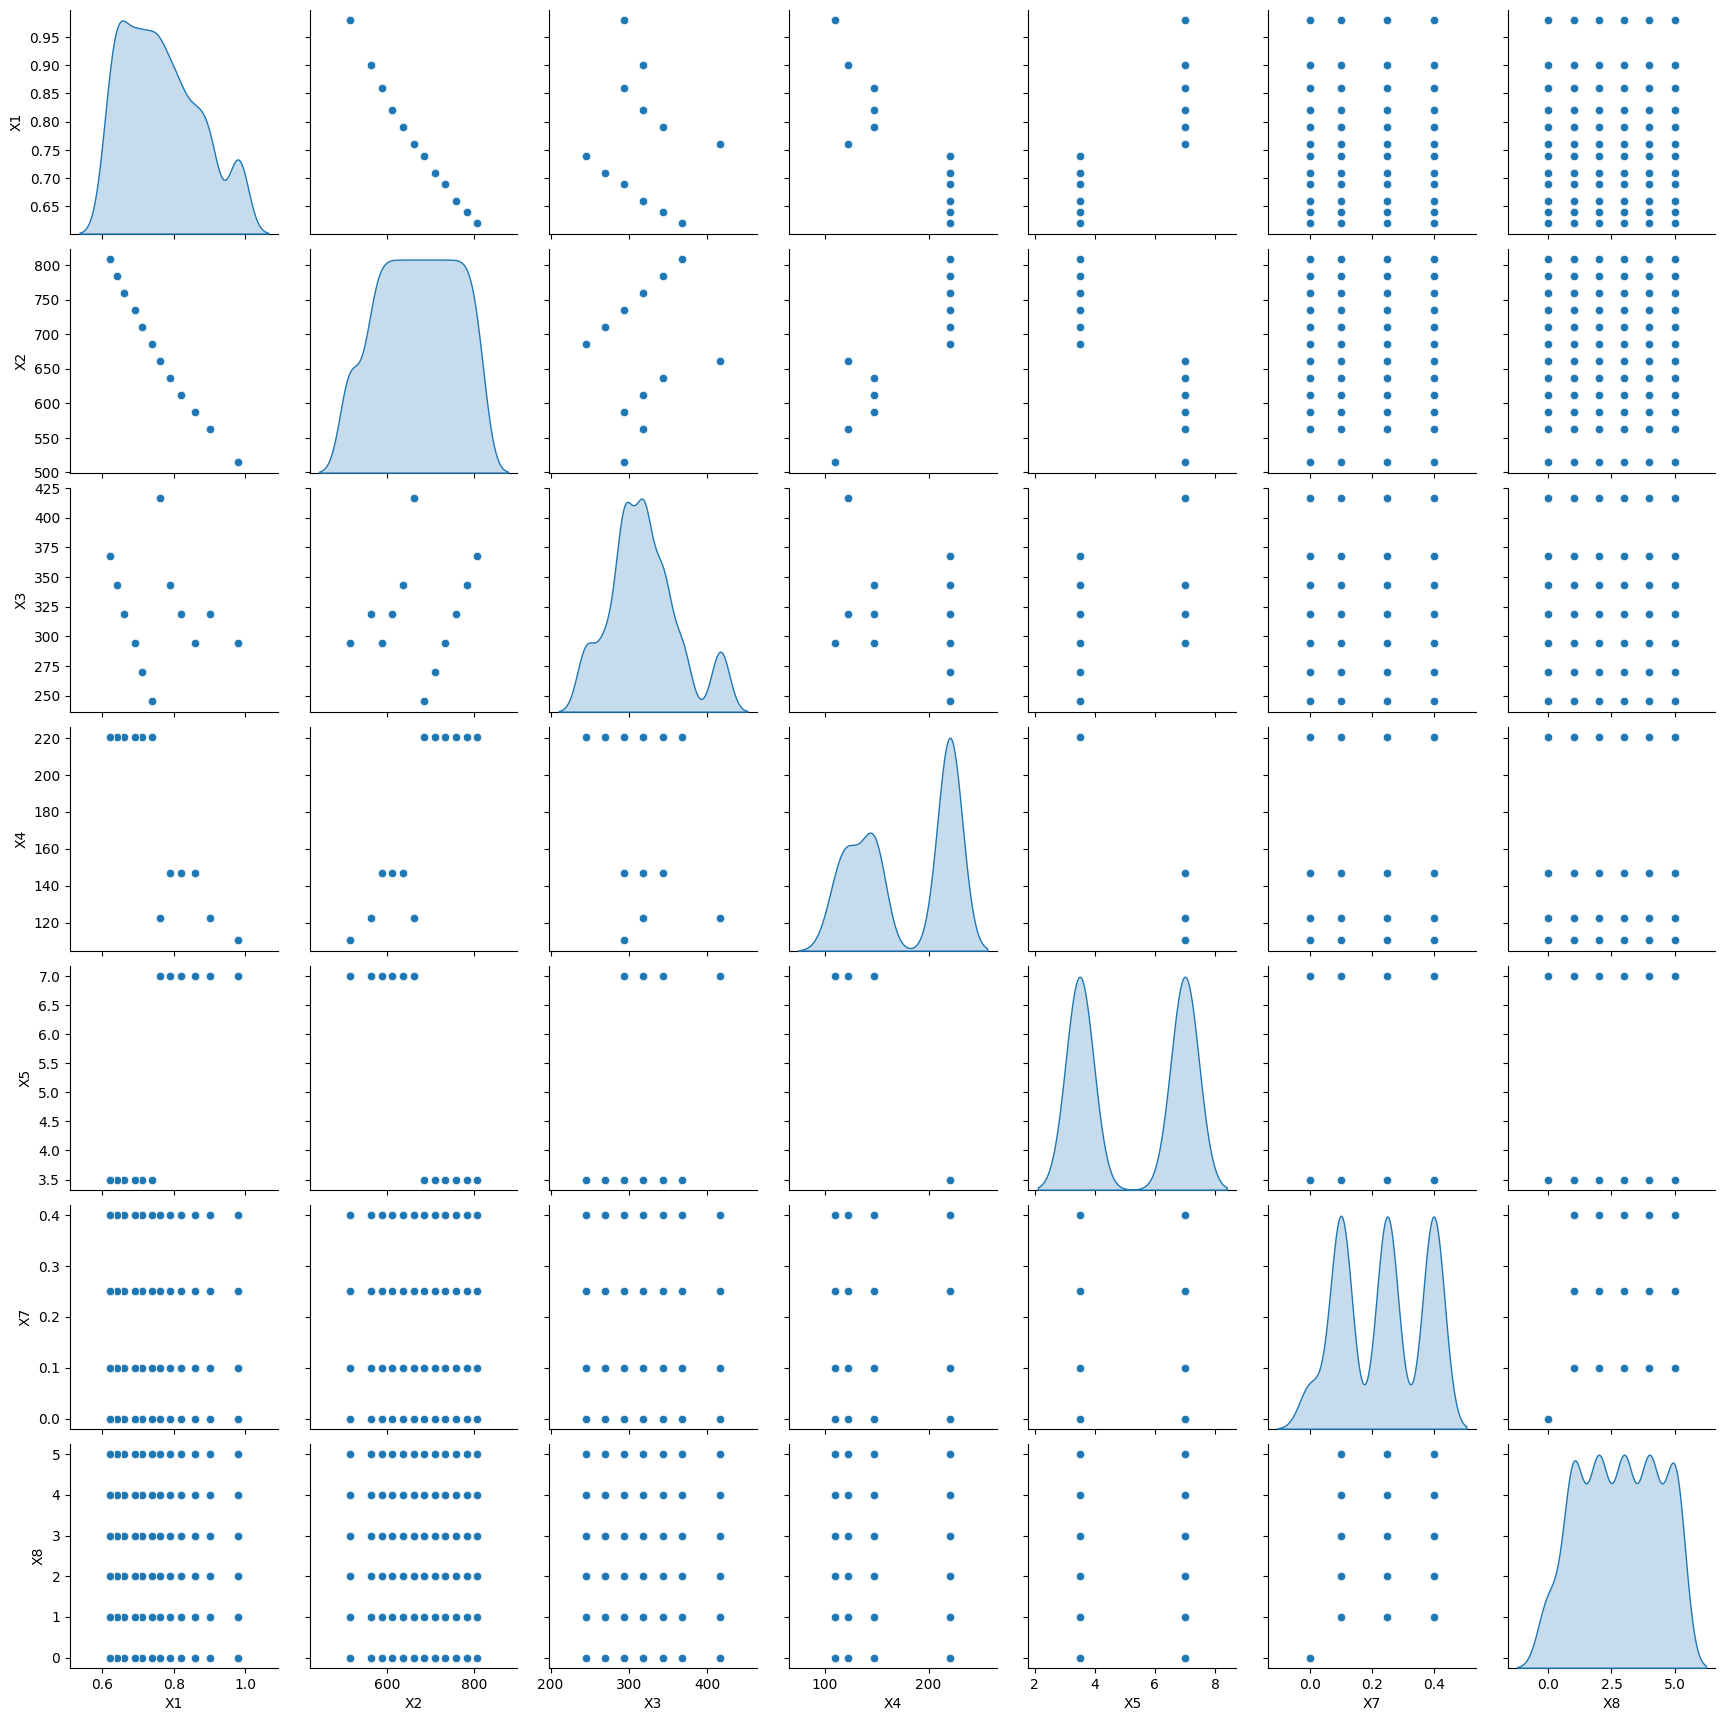

In [41]:
X = enef_dup[['X1','X2','X3','X4','X5','X7','X8']]
y = enef_dup['Y1']

X.head()
X.describe()
y.head()
y.describe()
print(X, y)

sns.pairplot(X, diag_kind='kde')

# Linear Regression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model1 = LinearRegression()
scaler = StandardScaler()

pipeline1 = make_pipeline(
    scaler,
    model1
)

In [63]:
pipeline1.fit(X_train, y_train)
y_pred = pipeline1.predict(X_test)

mse_value = mean_squared_error(y_test, y_pred)
rmse_value = np.sqrt(mse_value)
print("Mean Squared Error: ", mse_value)
print("\nRoot Mean Squared Error: ", rmse_value)

r2_value = r2_score(y_test, y_pred)
print("\nR-Squared: ", r2_value)

coefs_value = pipeline1.named_steps['linearregression'].coef_
print("\nCoefficients: ", coefs_value)

y_intercept = pipeline1.named_steps['linearregression'].intercept_
print("\nY-intercept: ", y_intercept)

Mean Squared Error:  9.1087779984373

Root Mean Squared Error:  3.018075214178285

R-Squared:  0.9126101643906339

Coefficients:  [-6.51353985e+00  2.61397748e+14 -1.28490983e+14 -2.66613969e+14
  7.34375000e+00  2.71459961e+00  2.84835815e-01]

Y-intercept:  22.314237662945562


In [64]:
joblib.dump(pipeline1, '/content/drive/MyDrive/Colab Notebooks/LabExam1/linreg.pckl')

['/content/drive/MyDrive/Colab Notebooks/LabExam1/linreg.pckl']

In [65]:
loaded_model_joblib = joblib.load('/content/drive/MyDrive/Colab Notebooks/LabExam1/linreg.pckl')

print(pipeline1.score(X_test, y_test))

0.9126101643906339


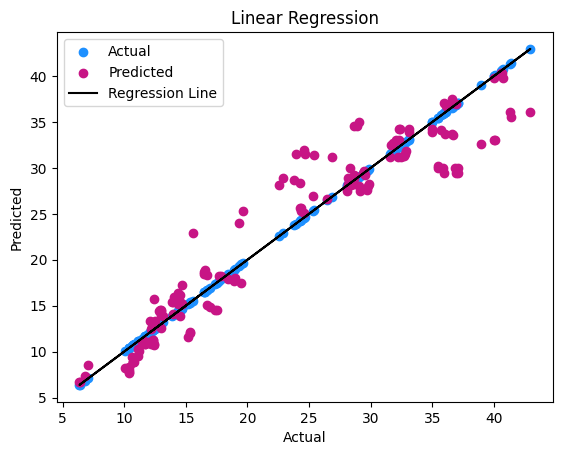

In [66]:
def linreg(y_test, y_pred):
  plt.scatter(y_test, y_test, color='dodgerblue', label='Actual')
  plt.scatter(y_test, y_pred, color='mediumvioletred', label='Predicted')
  plt.plot(y_test, y_test, color='black', label='Regression Line')
  plt.title('Linear Regression')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.legend()

linreg(y_test, y_pred)

plt.show()